In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [18]:
df = pd.read_csv('data/train.csv', parse_dates=['timestamp'])

In [19]:
print("Data Information:")
print(df.info())


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698675 entries, 0 to 698674
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   building_id         698675 non-null  int64         
 1   timestamp           698675 non-null  datetime64[ns]
 2   meter_reading       698675 non-null  float64       
 3   primary_use         698675 non-null  object        
 4   square_feet         698675 non-null  int64         
 5   year_built          698675 non-null  int64         
 6   air_temperature     698452 non-null  float64       
 7   cloud_coverage      394159 non-null  float64       
 8   dew_temperature     698452 non-null  float64       
 9   precip_depth_1_hr   698591 non-null  float64       
 10  sea_level_pressure  691953 non-null  float64       
 11  wind_direction      678753 non-null  float64       
 12  wind_speed          698675 non-null  float64       
dtypes: datetime

In [20]:
print("\nSummary Statistics:")
print(df.describe())



Summary Statistics:
         building_id                      timestamp  meter_reading  \
count  698675.000000                         698675  698675.000000   
mean       50.061555  2016-07-02 11:21:49.314345216     231.255069   
min         0.000000            2016-01-01 00:00:00       0.000000   
25%        24.000000            2016-04-02 00:00:00       0.000000   
50%        50.000000            2016-07-02 18:00:00      71.259300   
75%        76.000000            2016-10-02 04:00:00     302.715000   
max       100.000000            2016-12-31 23:00:00    4521.000000   
std        29.345241                            NaN     382.396065   

         square_feet     year_built  air_temperature  cloud_coverage  \
count  698675.000000  698675.000000    698452.000000   394159.000000   
mean    88803.210646    1995.637087        22.841813        3.043406   
min       283.000000    1968.000000         1.700000        0.000000   
25%     24456.000000    1985.000000        18.900000        

Missing Values Analysis


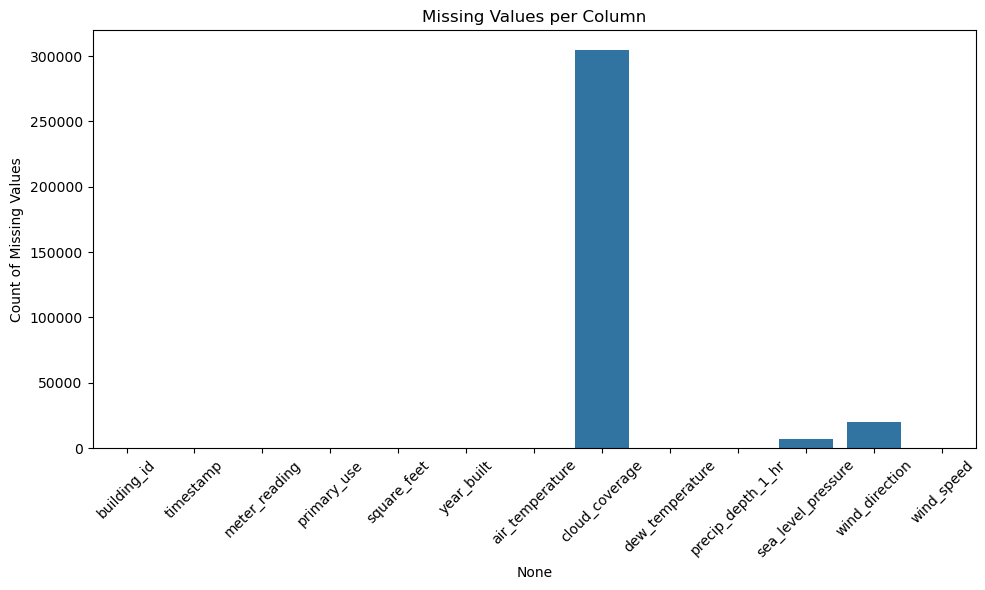

In [21]:
print("Missing Values Analysis")
missing_counts = df.isnull().sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_counts.index, y=missing_counts.values)
plt.title("Missing Values per Column")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('./plots/missing_values_per_column.png')
plt.show()


In [22]:
missing_counts

building_id                0
timestamp                  0
meter_reading              0
primary_use                0
square_feet                0
year_built                 0
air_temperature          223
cloud_coverage        304516
dew_temperature          223
precip_depth_1_hr         84
sea_level_pressure      6722
wind_direction         19922
wind_speed                 0
dtype: int64

Distribution Analysis: Histogram and Boxplot for meter_reading


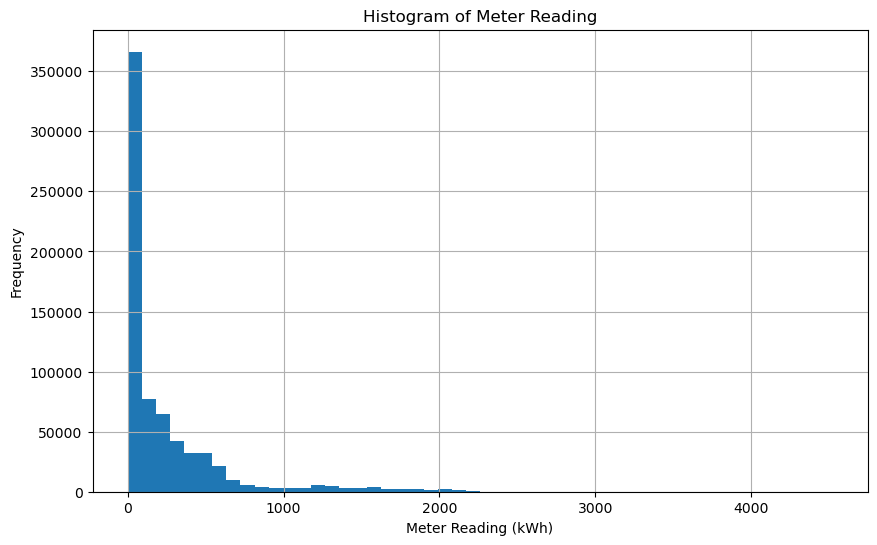

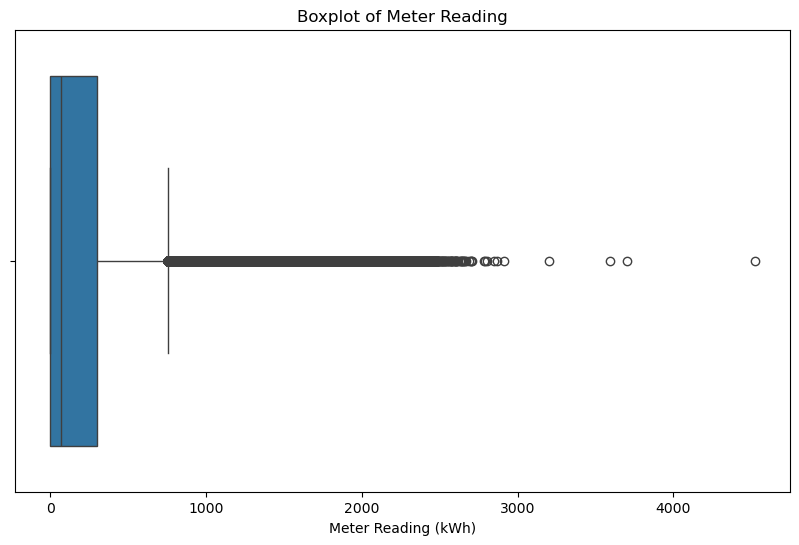

In [23]:
print("Distribution Analysis: Histogram and Boxplot for meter_reading")
plt.figure(figsize=(10, 6))
df['meter_reading'].hist(bins=50)
plt.title('Histogram of Meter Reading')
plt.xlabel('Meter Reading (kWh)')
plt.ylabel('Frequency')
plt.savefig('meter_reading_histogram.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['meter_reading'])
plt.title('Boxplot of Meter Reading')
plt.xlabel('Meter Reading (kWh)')
plt.savefig('./plots/meter_reading_boxplot.png')
plt.show()


Categorical Analysis: primary_use distribution


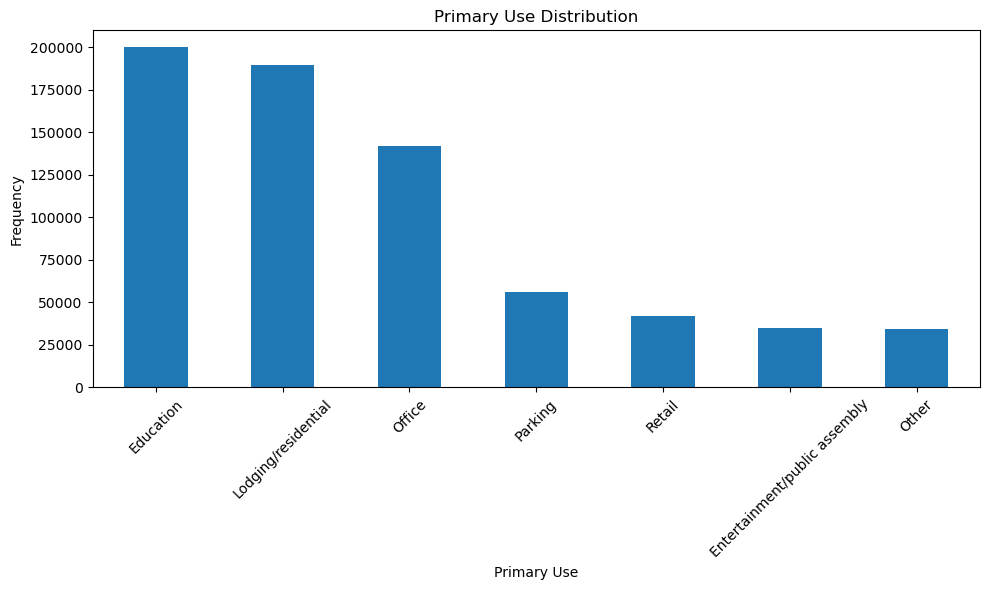

In [24]:
print("Categorical Analysis: primary_use distribution")
df['primary_use'].value_counts()
plt.figure(figsize=(10, 6))
df['primary_use'].value_counts().plot(kind='bar')
plt.title('Primary Use Distribution')
plt.xlabel('Primary Use')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('./plots/primary_use_distribution.png')
plt.show()


Time Series Analysis: Meter Reading over Time


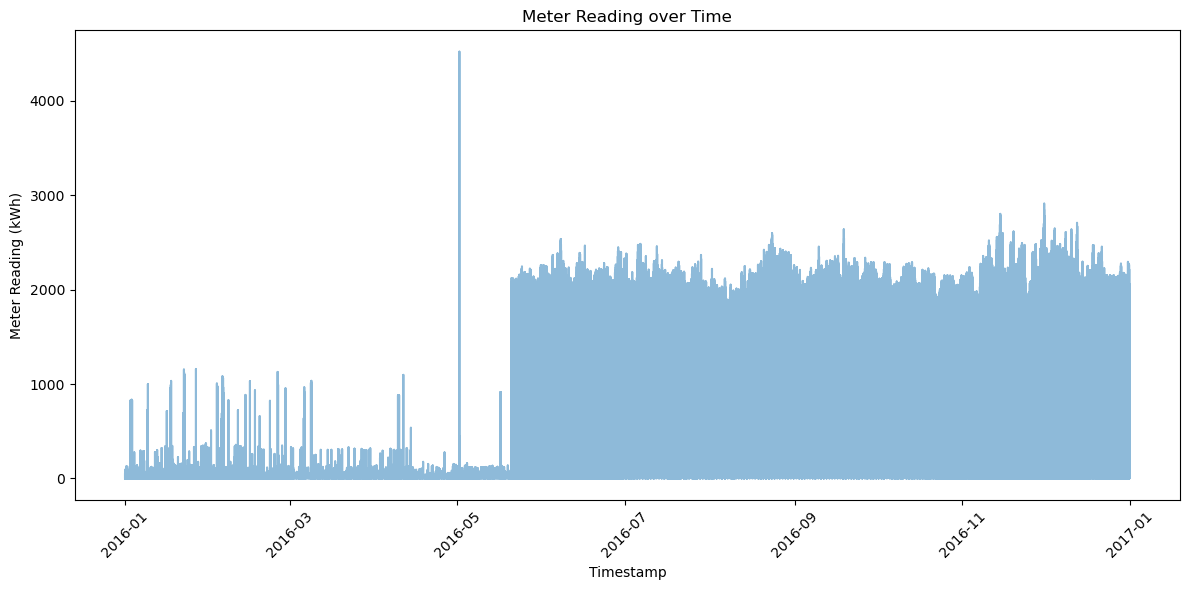

In [25]:
print("Time Series Analysis: Meter Reading over Time")
df['meter_reading'].describe()
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['meter_reading'], alpha=0.5)
plt.title('Meter Reading over Time')
plt.xlabel('Timestamp')
plt.ylabel('Meter Reading (kWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('./plots/meter_reading_timeseries.png')
plt.show()


In [26]:
df.columns

Index(['building_id', 'timestamp', 'meter_reading', 'primary_use',
       'square_feet', 'year_built', 'air_temperature', 'cloud_coverage',
       'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
       'wind_direction', 'wind_speed'],
      dtype='object')

Correlation Analysis: Correlation Matrix for Numeric Features


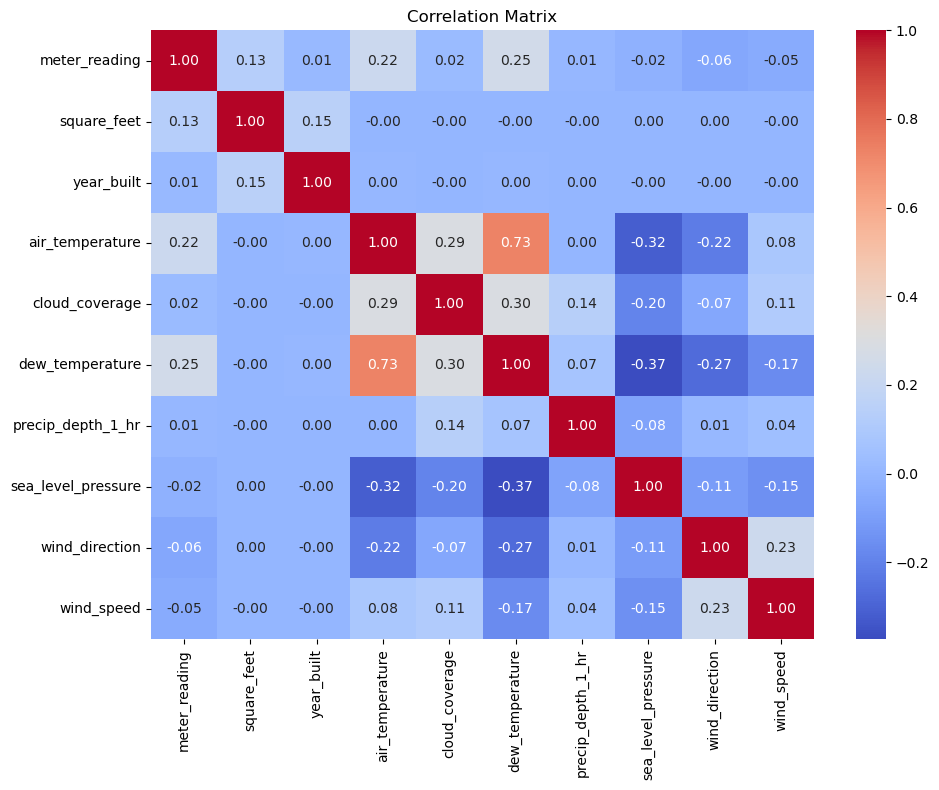

In [27]:
print("Correlation Analysis: Correlation Matrix for Numeric Features")
numeric_cols = ['meter_reading', 'square_feet', 'year_built', 'air_temperature', 'cloud_coverage',
                'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure', 
                'wind_direction', 'wind_speed']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('./plots/correlation_matrix.png')
plt.show()


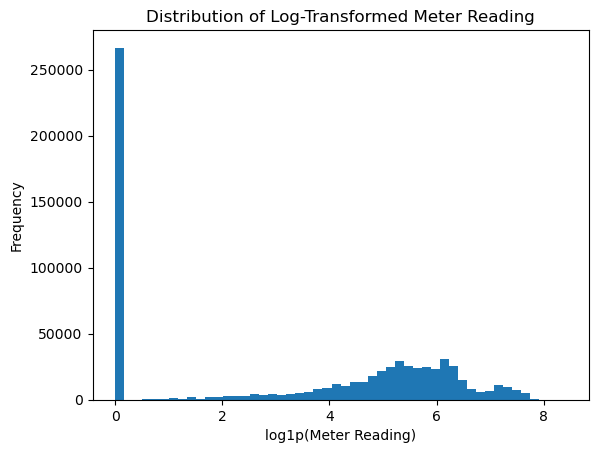

In [28]:
meter_log = np.log1p(df['meter_reading'])
plt.hist(meter_log, bins=50)
plt.title('Distribution of Log-Transformed Meter Reading')
plt.xlabel('log1p(Meter Reading)')
plt.ylabel('Frequency')
plt.savefig('./plots/log_transformed_meter_reading.png')
plt.show()

In [29]:
df['primary_use'].value_counts()

primary_use
Education                        199874
Lodging/residential              189669
Office                           141949
Parking                           56246
Retail                            42175
Entertainment/public assembly     34665
Other                             34097
Name: count, dtype: int64

## Strategies for tackling missing values

In [30]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

minimal_cols = ['air_temperature', 'dew_temperature', 'precip_depth_1_hr']
moderate_cols = ['sea_level_pressure', 'wind_direction']

minimal_imputer = SimpleImputer(strategy='mean')
moderate_imputer = SimpleImputer(strategy='median')

preprocessor = ColumnTransformer(
    transformers=[
        ('minimal', minimal_imputer, minimal_cols),
        ('moderate', moderate_imputer, moderate_cols)
    ],
    remainder='passthrough'
)

pipeline1 = make_pipeline(preprocessor)
df_transformed = pipeline1.fit_transform(df)

transformed_cols = minimal_cols + moderate_cols + [col for col in df.columns if col not in minimal_cols + moderate_cols]
df_transformed = pd.DataFrame(df_transformed, columns=transformed_cols)
print(df_transformed.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698675 entries, 0 to 698674
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   air_temperature     698675 non-null  object        
 1   dew_temperature     698675 non-null  object        
 2   precip_depth_1_hr   698675 non-null  object        
 3   sea_level_pressure  698675 non-null  object        
 4   wind_direction      698675 non-null  object        
 5   building_id         698675 non-null  object        
 6   timestamp           698675 non-null  datetime64[ns]
 7   meter_reading       698675 non-null  object        
 8   primary_use         698675 non-null  object        
 9   square_feet         698675 non-null  object        
 10  year_built          698675 non-null  object        
 11  cloud_coverage      394159 non-null  object        
 12  wind_speed          698675 non-null  object        
dtypes: datetime64[ns](1), object(

In [31]:
df_transformed.isnull().sum()

air_temperature            0
dew_temperature            0
precip_depth_1_hr          0
sea_level_pressure         0
wind_direction             0
building_id                0
timestamp                  0
meter_reading              0
primary_use                0
square_feet                0
year_built                 0
cloud_coverage        304516
wind_speed                 0
dtype: int64

## Tackling missing cloud coverage that makes up 43% of the entire data

In [32]:
overall_corr = df_transformed[['cloud_coverage', 'air_temperature', 'dew_temperature', 'sea_level_pressure']].corr()
print("Overall Correlations:")
print(overall_corr)


Overall Correlations:
                    cloud_coverage  air_temperature  dew_temperature  \
cloud_coverage            1.000000         0.292696         0.296968   
air_temperature           0.292696         1.000000         0.727196   
dew_temperature           0.296968         0.727196         1.000000   
sea_level_pressure       -0.195584        -0.318226        -0.372811   

                    sea_level_pressure  
cloud_coverage               -0.195584  
air_temperature              -0.318226  
dew_temperature              -0.372811  
sea_level_pressure            1.000000  


In [33]:
df['building_id']
sample_buildings = df['building_id'].sample(10, random_state=42)
sample_buildings

115439    95
235562     2
511142    10
608842    75
577348    63
311166    48
397308    89
540498     8
698013    66
444450    83
Name: building_id, dtype: int64

In [34]:
for b in sample_buildings:
    subset = df[df['building_id'] == b]
    corr = subset[['cloud_coverage', 'air_temperature', 'dew_temperature', 'sea_level_pressure']].corr()
    print(f"\nCorrelations for Building {b}:")
    print(corr)


Correlations for Building 95:
                    cloud_coverage  air_temperature  dew_temperature  \
cloud_coverage            1.000000         0.293305         0.292152   
air_temperature           0.293305         1.000000         0.729158   
dew_temperature           0.292152         0.729158         1.000000   
sea_level_pressure       -0.199981        -0.323321        -0.374206   

                    sea_level_pressure  
cloud_coverage               -0.199981  
air_temperature              -0.323321  
dew_temperature              -0.374206  
sea_level_pressure            1.000000  

Correlations for Building 2:
                    cloud_coverage  air_temperature  dew_temperature  \
cloud_coverage            1.000000         0.290580         0.301464   
air_temperature           0.290580         1.000000         0.727818   
dew_temperature           0.301464         0.727818         1.000000   
sea_level_pressure       -0.199477        -0.308817        -0.370450   

            

In [35]:
df['month'] = df['timestamp'].dt.month
monthly_corr = df.groupby('month')[['cloud_coverage', 'air_temperature', 'dew_temperature', 'sea_level_pressure']].corr()

print("Monthly Correlations:")
for month in df['month'].unique():
    subset = df[df['month'] == month]
    corr = subset[['cloud_coverage', 'air_temperature', 'dew_temperature', 'sea_level_pressure']].corr()
    print(f"\nCorrelations for Month {month}:")
    print(corr)


Monthly Correlations:

Correlations for Month 1:
                    cloud_coverage  air_temperature  dew_temperature  \
cloud_coverage            1.000000         0.403551         0.571274   
air_temperature           0.403551         1.000000         0.702637   
dew_temperature           0.571274         0.702637         1.000000   
sea_level_pressure       -0.274833        -0.420736        -0.564869   

                    sea_level_pressure  
cloud_coverage               -0.274833  
air_temperature              -0.420736  
dew_temperature              -0.564869  
sea_level_pressure            1.000000  

Correlations for Month 2:
                    cloud_coverage  air_temperature  dew_temperature  \
cloud_coverage            1.000000         0.369346         0.395593   
air_temperature           0.369346         1.000000         0.622389   
dew_temperature           0.395593         0.622389         1.000000   
sea_level_pressure       -0.364038        -0.368037        -0.463582  

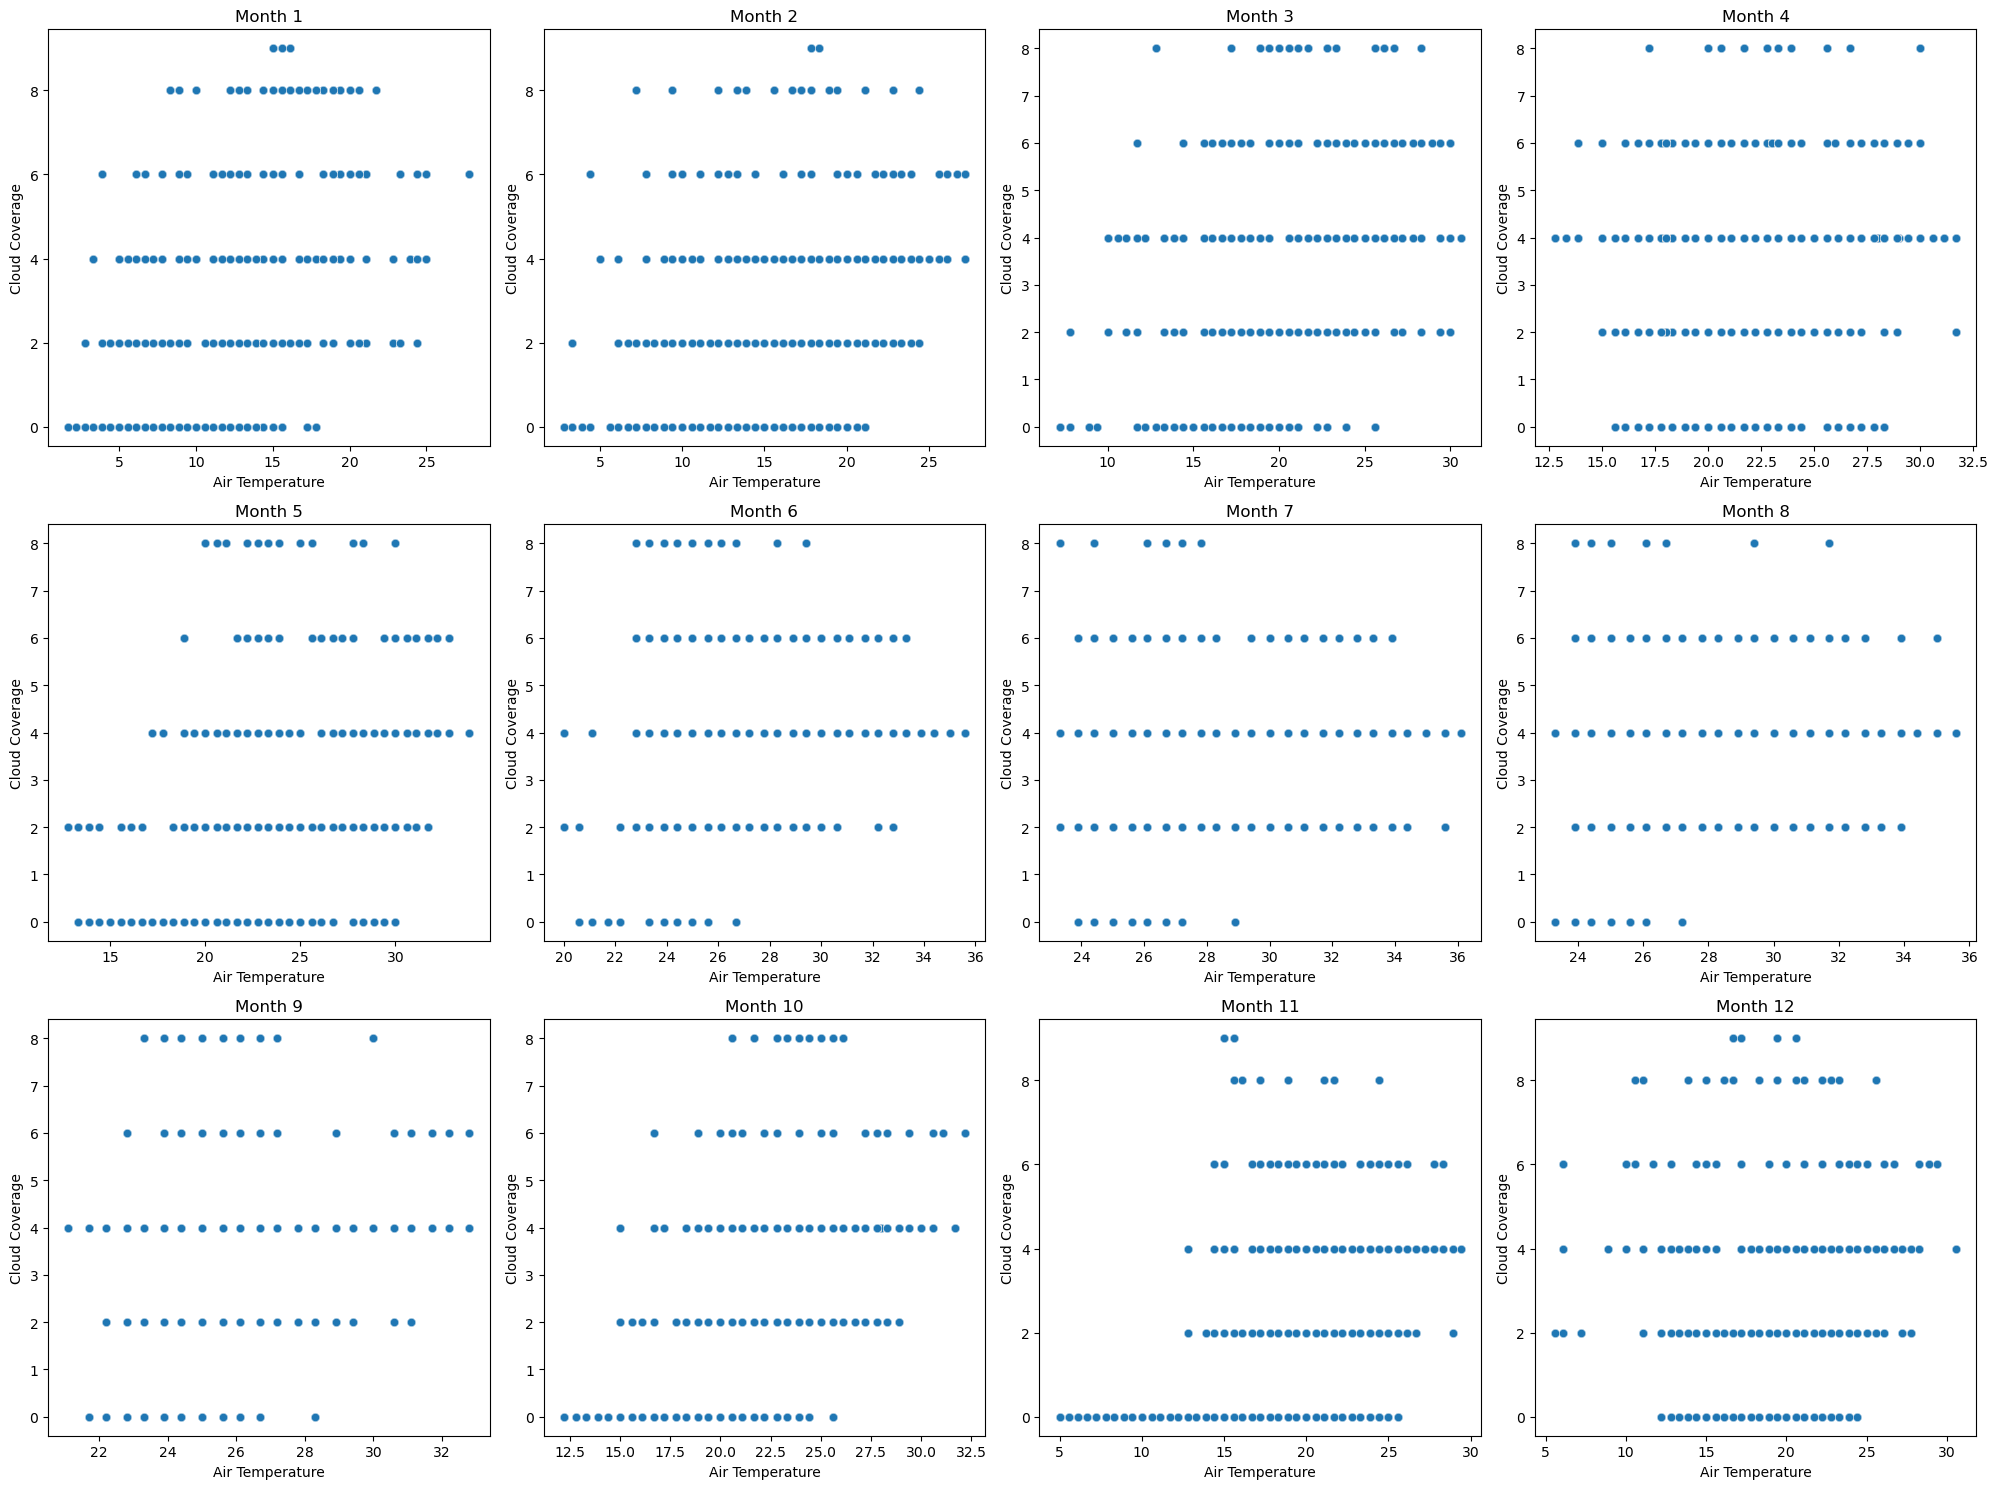

In [36]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15), sharex=False, sharey=False)

# Month wise scatter plot for air_temperature vs. cloud_coverage
for month in range(1, 13):
    ax = axes[(month - 1) // 4, (month - 1) % 4]
    subset = df[df['month'] == month]
    sns.scatterplot(data=subset, x='air_temperature', y='cloud_coverage', ax=ax, alpha=0.3)
    ax.set_title(f'Month {month}')
    ax.set_xlabel('Air Temperature')
    ax.set_ylabel('Cloud Coverage')

plt.tight_layout()
plt.savefig('./plots/scatter_air_temp_vs_cloud_coverage_by_month.png')
plt.show()

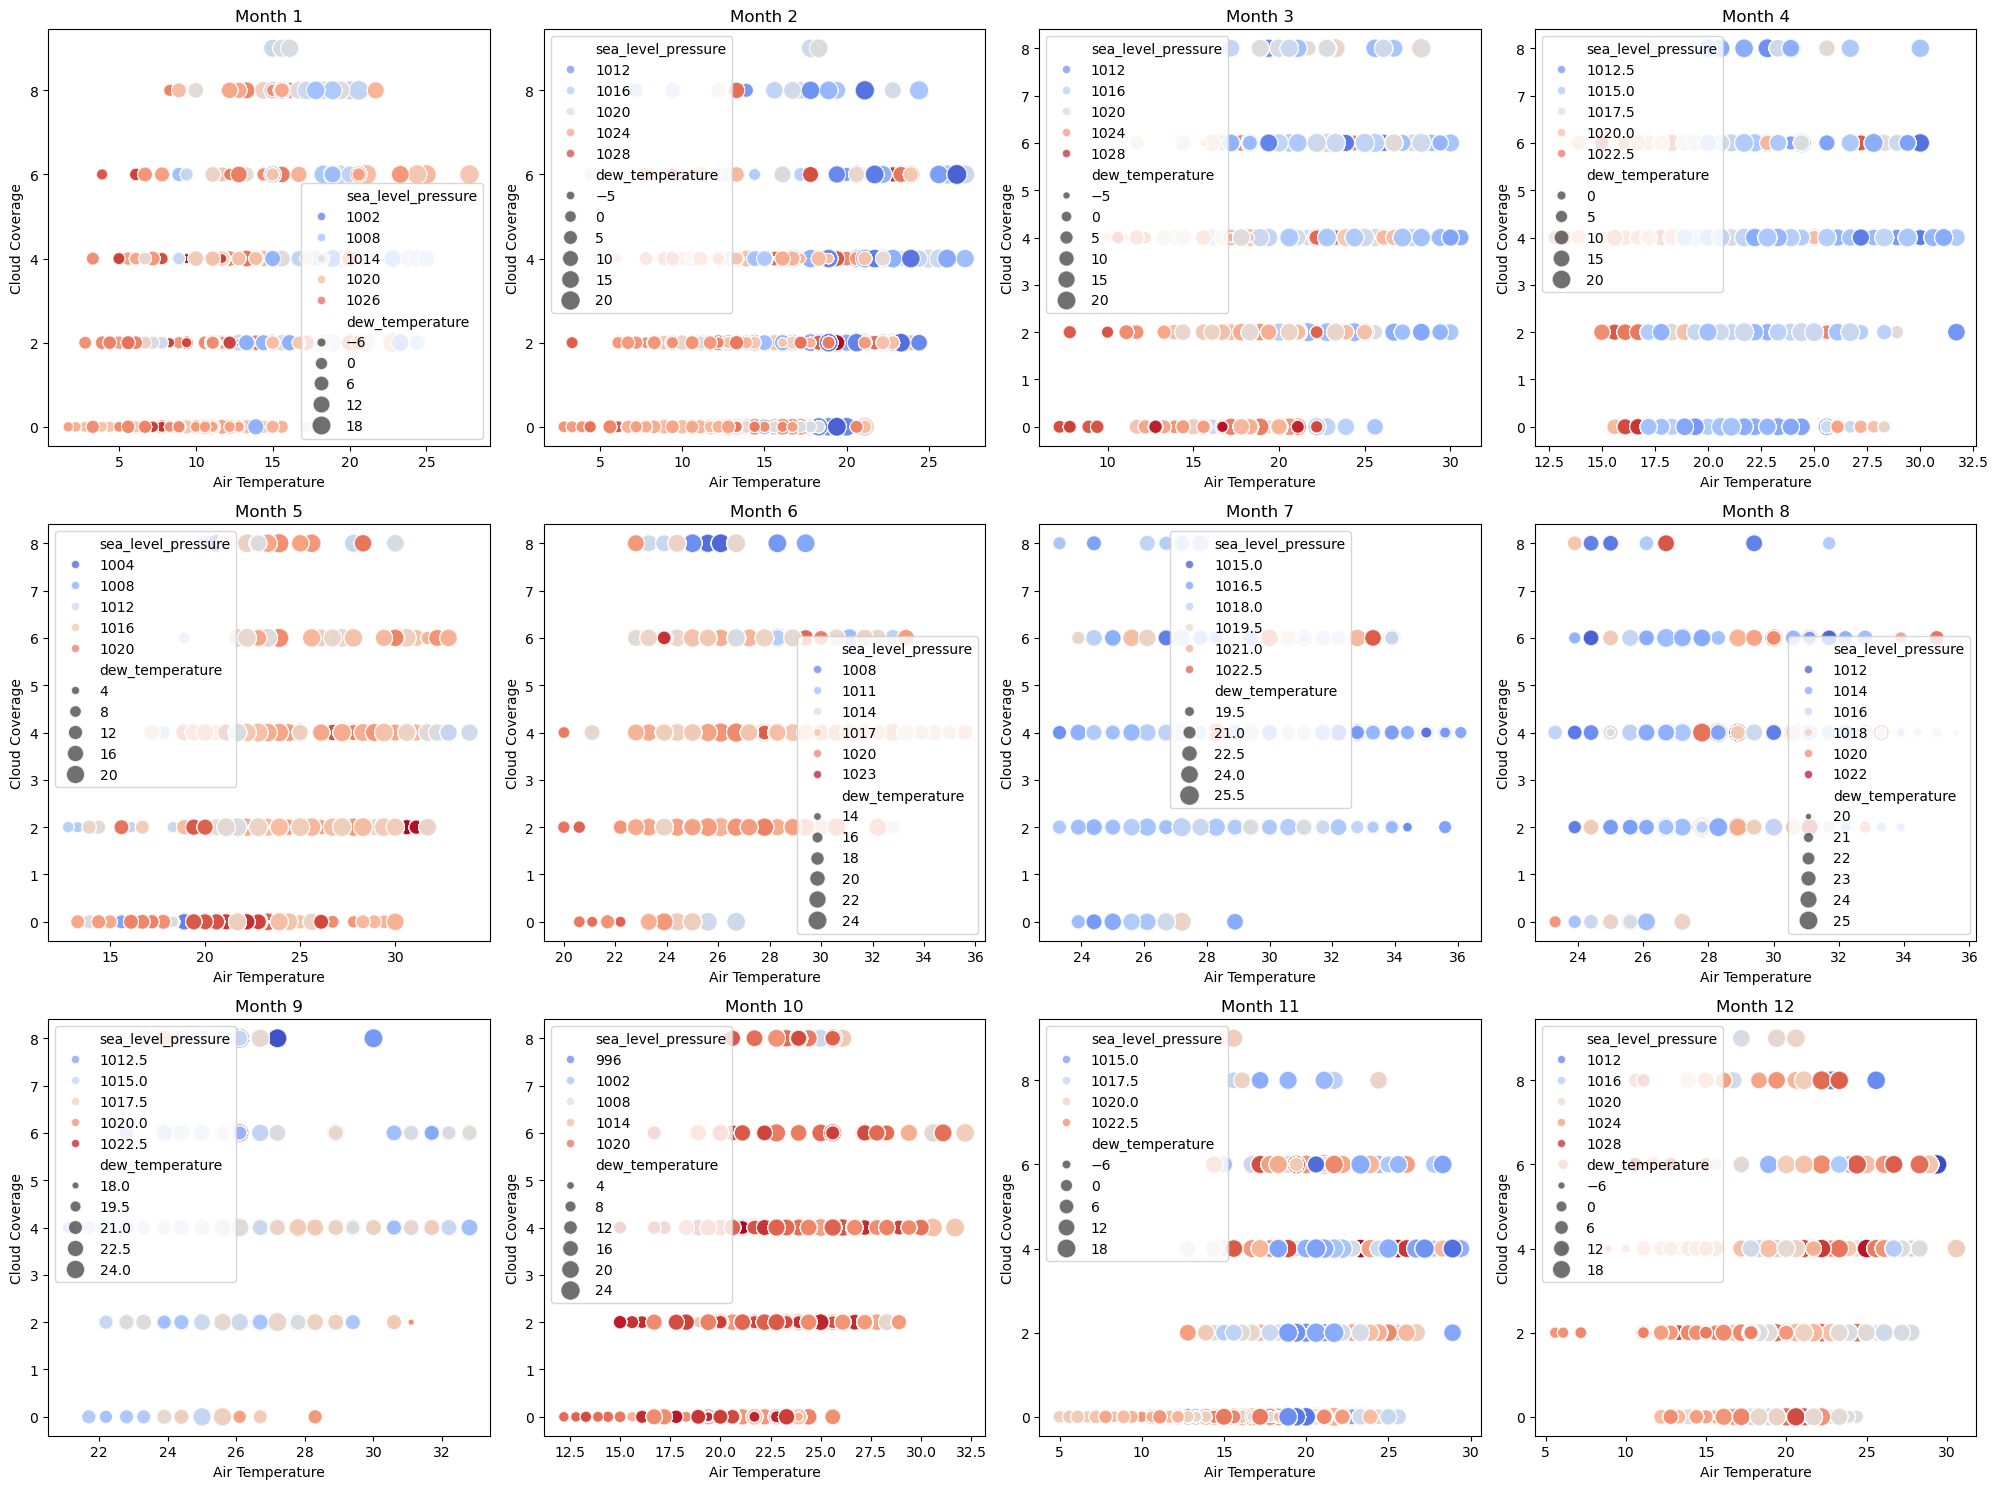

In [37]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15), sharex=False, sharey=False)

for month in range(1, 13):
    ax = axes[(month - 1) // 4, (month - 1) % 4]
    subset = df[df['month'] == month]
    
    # Extended scatter plot with additional features:
    # - x is air_temperature
    # - y is cloud_coverage
    # - Color (hue) represents sea_level_pressure
    # - Size represents dew_temperature
    sns.scatterplot(
        data=subset,
        x='air_temperature',
        y='cloud_coverage',
        hue='sea_level_pressure',   
        size='dew_temperature',     
        palette='coolwarm',
        sizes=(20, 200),
        alpha=0.7,
        ax=ax
    )
    
    ax.set_title(f'Month {month}')
    ax.set_xlabel('Air Temperature')
    ax.set_ylabel('Cloud Coverage')

plt.tight_layout()
plt.savefig('./plots/scatter_air_temp_vs_cloud_coverage_by_month_with_extras.png')
plt.show()



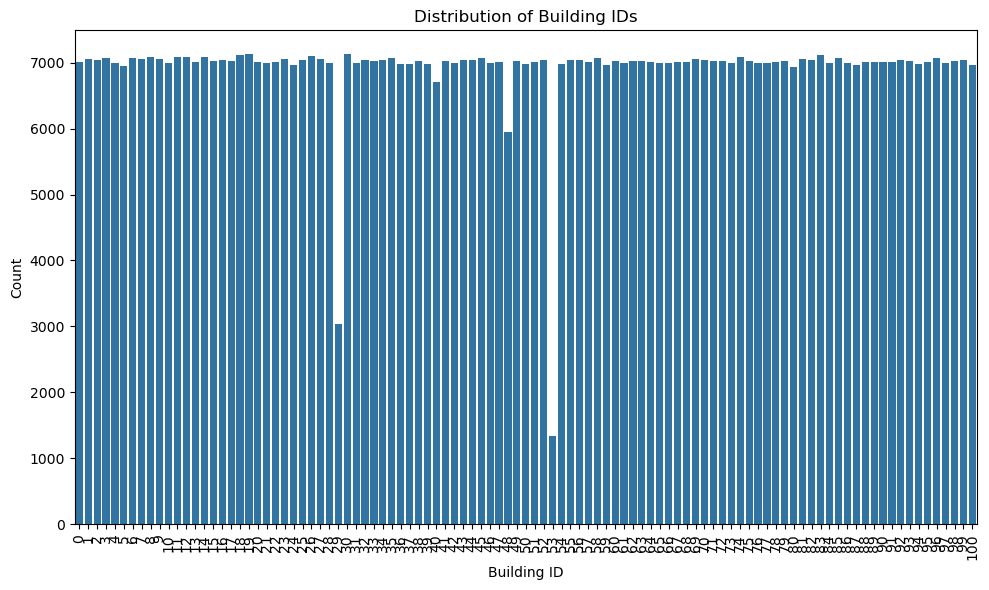

In [38]:
df['building_id'].value_counts()

# Distribution of building_id
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='building_id')
plt.title('Distribution of Building IDs')
plt.xlabel('Building ID')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('./plots/building_id_distribution.png')
plt.show()

             total_records  missing_count  missing_fraction
building_id                                                
0                     3966           3039          0.766263
1                     4013           3043          0.758286
2                     3981           3062          0.769153
3                     3994           3075          0.769905
4                     3950           3047          0.771392


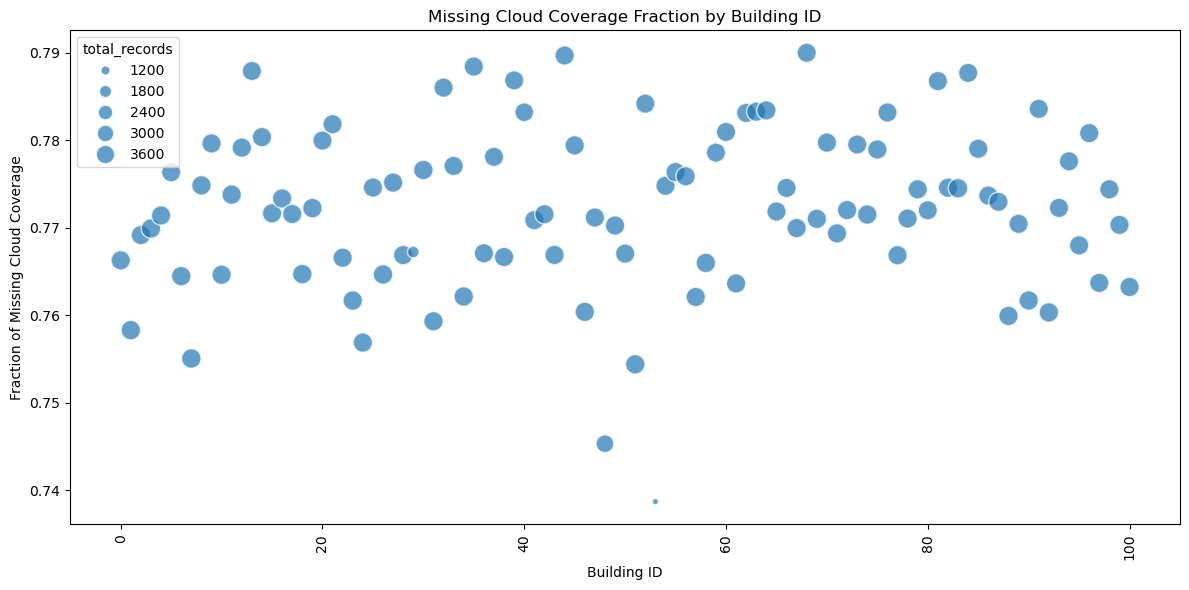

In [39]:
df['cloud_missing'] = df['cloud_coverage'].isnull()

grouped = df.groupby('building_id').agg(
    total_records=('cloud_coverage', 'count'),
    missing_count=('cloud_missing', 'sum')
)

grouped['missing_fraction'] = grouped['missing_count'] / grouped['total_records']

print(grouped.head())

plt.figure(figsize=(12, 6))
sns.scatterplot(x=grouped.index, y='missing_fraction', size='total_records',
                data=grouped, sizes=(20, 200), alpha=0.7)
plt.xlabel('Building ID')
plt.ylabel('Fraction of Missing Cloud Coverage')
plt.title('Missing Cloud Coverage Fraction by Building ID')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('./plots/missing_cloud_coverage_fraction_by_building_id.png')
plt.show()

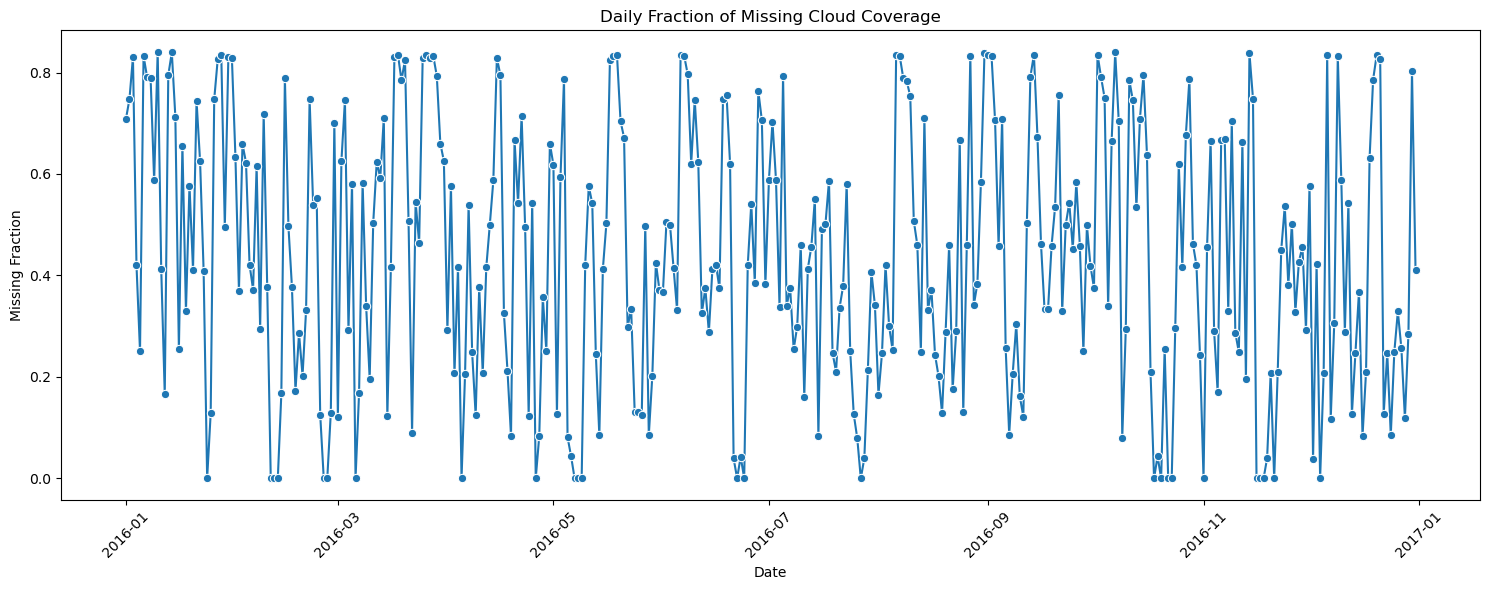

/var/folders/kd/8px83hws28b4rdhhcryn4m1m0000gn/T/ipykernel_36023/312681693.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hour', y='missing_fraction', data=hourly_missing, palette='viridis')


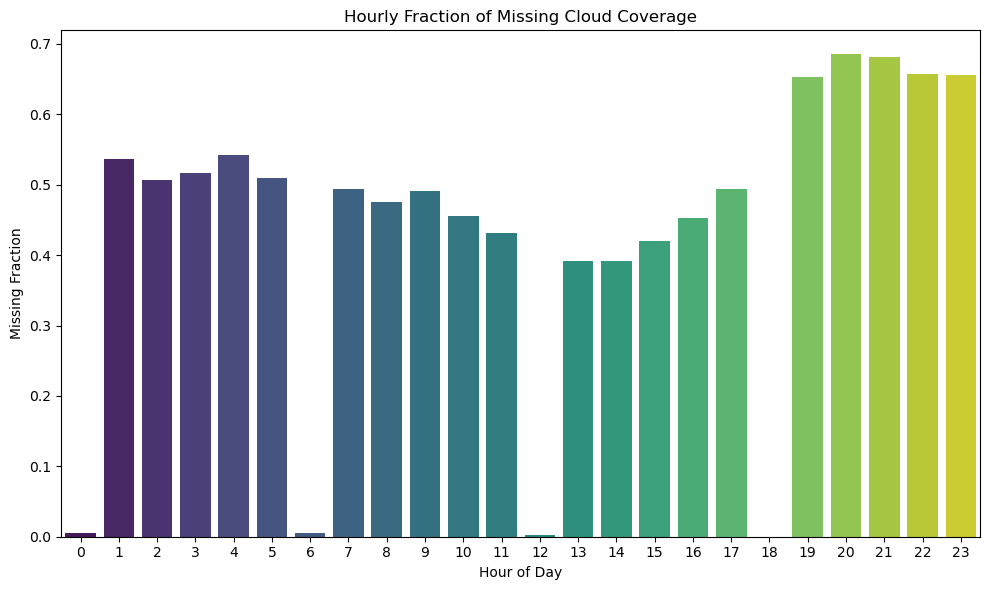

In [40]:
if df['timestamp'].isnull().any():
    raise ValueError("Some timestamps could not be parsed. Check your 'timestamp' column.")

df['date'] = df['timestamp'].dt.date
df['hour'] = df['timestamp'].dt.hour


# Daily Missingness: Calculating the fraction of missing cloud_coverage for each date.


daily_missing = df.groupby('date')['cloud_missing'].agg(['sum', 'count']).reset_index()
daily_missing.rename(columns={'sum': 'missing_count', 'count': 'total_count'}, inplace=True)
daily_missing['missing_fraction'] = daily_missing['missing_count'] / daily_missing['total_count']

plt.figure(figsize=(15, 6))
sns.lineplot(x='date', y='missing_fraction', data=daily_missing, marker='o')
plt.title("Daily Fraction of Missing Cloud Coverage")
plt.xlabel("Date")
plt.ylabel("Missing Fraction")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("./plots/daily_missing_fraction.png")
plt.show()

# Hourly Missingness: Calculating the average missing fraction for each hour of the day.
hourly_missing = df.groupby('hour')['cloud_missing'].mean().reset_index(name='missing_fraction')

plt.figure(figsize=(10, 6))
sns.barplot(x='hour', y='missing_fraction', data=hourly_missing, palette='viridis')
plt.title("Hourly Fraction of Missing Cloud Coverage")
plt.xlabel("Hour of Day")
plt.ylabel("Missing Fraction")
plt.tight_layout()
plt.savefig("./plots/hourly_missing_fraction.png")
plt.show()

## Strategies for handling missing cloud coverage

- Time based imputation strategy
- Multivariate Imputation - Iterative Imputer - experimental feature in SKLearn
- Cluster based startegies
- Season specific imputation
- Modelling location dependencies without explicit geographic data
    - Using building id as a proxy for location 
    - Aggregate weather patterns per building and unsupervised clustering
    - Incorporating time based features for seasonality

#### Strategy 1 - Time based imputation

In [41]:
def time_interpolate_building(group):
    group = group.set_index('timestamp')
    group['cloud_coverage'] = group['cloud_coverage'].interpolate(method='polynomial', limit_direction='both', order=10, limit = 20)
    group['cloud_coverage'] = group['cloud_coverage'].ffill().bfill()
    return group.reset_index()

In [42]:
df_sorted = df_transformed.sort_values(by=['building_id', 'timestamp']).copy()
df_time_imputed = df_sorted.groupby('building_id', group_keys=False).apply(time_interpolate_building)


/var/folders/kd/8px83hws28b4rdhhcryn4m1m0000gn/T/ipykernel_36023/4092158152.py:3: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  group['cloud_coverage'] = group['cloud_coverage'].interpolate(method='polynomial', limit_direction='both', order=10, limit = 20)
/var/folders/kd/8px83hws28b4rdhhcryn4m1m0000gn/T/ipykernel_36023/4092158152.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  group['cloud_coverage'] = group['cloud_coverage'].ffill().bfill()
/var/folders/kd/8px83hws28b4rdhhcryn4m1m0000gn/T/ipykernel_36023/4092158152.py:3: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects

In [43]:
if df_time_imputed['cloud_coverage'].isnull().any():
    print("Warning: Some cloud_coverage values are still missing after time-based interpolation.")
else:
    print("Time-based interpolation of cloud_coverage complete; no missing values remain.")


Time-based interpolation of cloud_coverage complete; no missing values remain.


Correlation Analysis: Correlation Matrix for Numeric Features


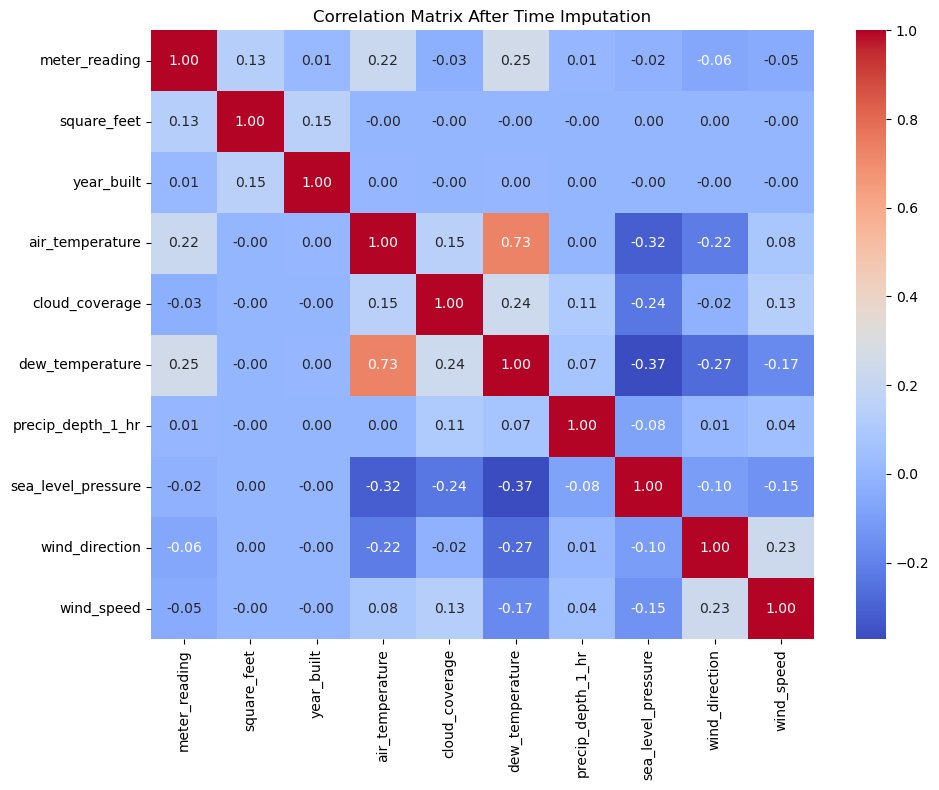

In [55]:
print("Correlation Analysis: Correlation Matrix for Numeric Features")
numeric_cols = ['meter_reading', 'square_feet', 'year_built', 'air_temperature', 'cloud_coverage',
                'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure', 
                'wind_direction', 'wind_speed']
corr_matrix = df_time_imputed[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix After Time Imputation')
plt.tight_layout()
plt.savefig('./plots/correlation_matrix_after_time_imputed_cloudcoverage.png')
plt.show()


In [45]:
df_time_imputed.to_csv('data/train_time_imputed_cloud_coverage.csv', index=False)

## Strategy 2 - Iterative imputer 

In [46]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [47]:
from sklearn.experimental import enable_iterative_imputer # noqa
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [59]:
df_transformed_1 = df_transformed.copy()
df_transformed_1['hour'] = df_transformed_1['timestamp'].dt.hour
df_transformed_1['month'] = df_transformed_1['timestamp'].dt.month
impute_features = ['cloud_coverage', "air_temperature", "dew_temperature", "sea_level_pressure", "wind_speed", "hour", "month", "precip_depth_1_hr"]

df_impute = df[impute_features].copy()
estimator = XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)
iterative_imputer = IterativeImputer(
    estimator=estimator,
    initial_strategy="median",
    max_iter=10,
    random_state=42
)



In [60]:
imputed_array = iterative_imputer.fit_transform(df_impute)
df_imputed = pd.DataFrame(imputed_array, columns=impute_features)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [61]:
df_transformed_1.columns

Index(['air_temperature', 'dew_temperature', 'precip_depth_1_hr',
       'sea_level_pressure', 'wind_direction', 'building_id', 'timestamp',
       'meter_reading', 'primary_use', 'square_feet', 'year_built',
       'cloud_coverage', 'wind_speed', 'hour', 'month'],
      dtype='object')

In [62]:
df_iterative_imputer = pd.concat([df_transformed_1.drop(columns=impute_features), df_imputed], axis=1)
df_iterative_imputer['cloud_coverage'].isnull().sum()
df_iterative_imputer.columns

Index(['wind_direction', 'building_id', 'timestamp', 'meter_reading',
       'primary_use', 'square_feet', 'year_built', 'cloud_coverage',
       'air_temperature', 'dew_temperature', 'sea_level_pressure',
       'wind_speed', 'hour', 'month', 'precip_depth_1_hr'],
      dtype='object')

Correlation Analysis: Correlation Matrix for Numeric Features


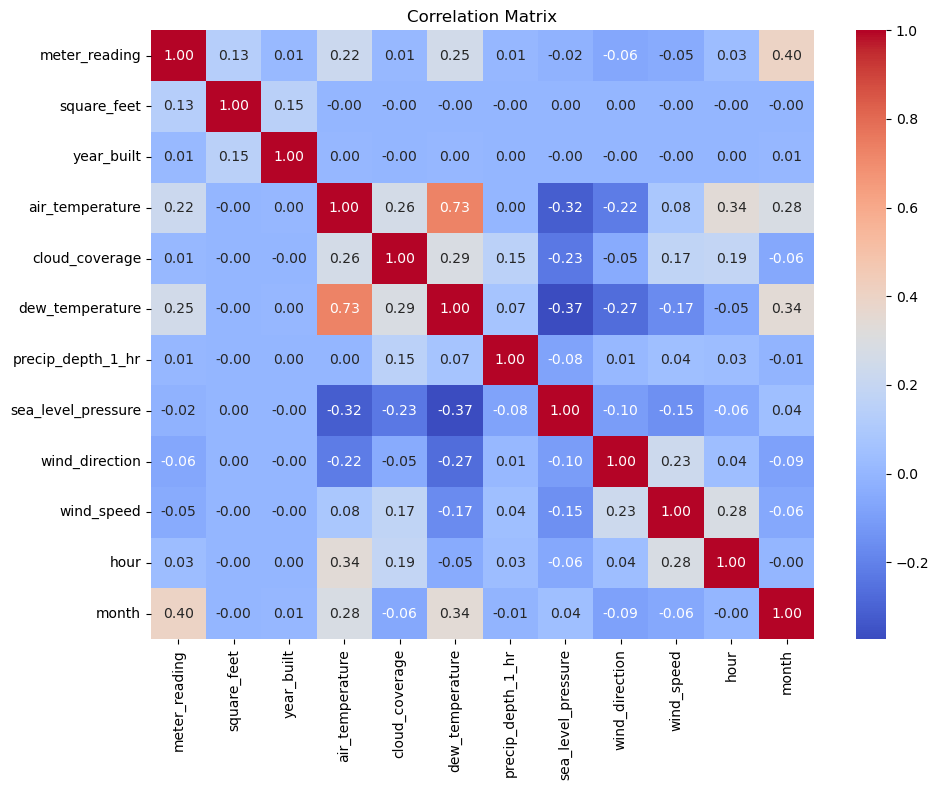

In [63]:
print("Correlation Analysis: Correlation Matrix for Numeric Features")
numeric_cols = ['meter_reading', 'square_feet', 'year_built', 'air_temperature', 'cloud_coverage',
                'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure', 
                'wind_direction', 'wind_speed', 'hour', 'month']
corr_matrix = df_iterative_imputer[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('./plots/correlation_matrix_iterative_imputer_cloudcoverage.png')
plt.show()


## Strategy 3 - predicting cloud coverage taking into consideration the location-id for each location where buildingId could work as a proxy for the locaiton